<a href="https://colab.research.google.com/github/PhiLNNT/Academic/blob/Subgradient-method-for-Convex-clustering-model/Unbalenced5_400_SubgradientMethodForConvexClusteringModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUBGARDIENT METHOD FOR SOLVING CONVEX CLUSTERING PROBLEM: 400 POINTS - 5 UNBALANCED CLUSTERS**

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.colors as mcolors
from random import  uniform
from sklearn.datasets import make_blobs

# Objective function: $f(x)=g(x)+h(x)$ where
$g(x):=\dfrac{1}{2}\sum\limits_{i=1}^n\left\|x^i-a^i\right\|^2,  h(x):=\gamma\sum\limits_{i<j}\left\|x^i-x^j\right\|_1$

# Define subgradient algorithm function

In [ ]:
def Loss(x):
    g=np.linalg.norm(x-a)
    x_bar=np.tile(x.reshape((-1,d)),n)
    h=x_bar-np.transpose(x)
    h_l1=np.sum(h[h>=0])
    L=0.5*g**2+h_l1
    return L,h
def subgradient(x):
    t=np.array([])
    x = np.where(x==0, uniform(-1, 1),np.sign(x))
    for i in range(0,n+1):
        x[i-1,0:d*(i)]=0
        t=np.hstack((t,x[i-1,d*(i):d*n]))
    return K@t[n*d:]
def subgradient_descent(x,step_size=0.01,iter=100):
    lst_cost=[]
    lst_x=[]
    new_cost,h=Loss(x)
    lst_cost.append(new_cost)
    lst_x.append(x)
    for i in range(1,iter+1):

        v=mu*subgradient(h)+(x-a)

        if np.linalg.norm(v)<1e-8:
            lst_cost.append(new_cost)
            lst_x.append(x)
            print('Stopped by subgradient = 0 at ',i,'-th iterattion')
            return  lst_cost,lst_x,i

        if i <10:
            x=x-step_size*v/(np.linalg.norm(v)*(i))
            #x=x-step_size*v
            #x=x-step_size*v/(np.linalg.norm(v)*np.sqrt(i))

        else:
            #x=x-step_size*v/(np.linalg.norm(v)*np.sqrt(i))
            x=x-step_size*v/(np.linalg.norm(v)*np.log10(i))

        new_cost,h=Loss(x)

        if i%10==1:
            print('iter %d' %i + ' cost: %.6f' %new_cost)
            #print(v)

        if abs(new_cost-lst_cost[-1])<1e-20:
            lst_cost.append(new_cost)
            lst_x.append(x)
            print('Stopped by early stopping at ',i,'-th iterattion')
            return  lst_cost,lst_x,i
        lst_cost.append(new_cost)
        lst_x.append(x)
    print('Stopped by max iteration')
    return lst_cost,lst_x,i

# Run algorithm

## Initial data step

In [ ]:
n=400
d=2
mu=0.0008

In [ ]:
#Tạo các tâm và các bộ điểm
centers = [[0, 1], [1, 0], [0,0], [-1,0], [0,-1]]
stds = [0.13, 0.12, 0.15, 0.14, 0.11]
X1, labels_true1 = make_blobs(n_samples=100, centers=[[0,1]], cluster_std=0.13, random_state=0)
X2, labels_true2 = make_blobs(n_samples=50, centers=[[1, 0]], cluster_std=0.12, random_state=1)
X3, labels_true3 = make_blobs(n_samples=150, centers=[[0,0]], cluster_std=0.15, random_state=0)
X4, labels_true4 = make_blobs(n_samples=25, centers=[[-1,0]], cluster_std=0.14, random_state=3)
X5, labels_true5 = make_blobs(n_samples=75, centers=[[0,-1]], cluster_std=0.11, random_state=4)
X=np.vstack((X1,X2))
X=np.vstack((X,X3))
X=np.vstack((X,X4))
X=np.vstack((X,X5))
Y=(np.transpose(X))
Y=np.split(Y,n,axis=1)
a=Y[0]
for i in range(1,n):
  a=np.vstack((a, Y[i]))
a=np.transpose(a)
a=a.ravel().tolist()
np.random.seed(2)
x=np.random.randint(1,10,(d*n))
print(x.shape)

(800,)


In [ ]:
I=np.identity(d*n)
J=np.hsplit(I,n)
O=np.zeros((d*n, d*n))
O=np.hsplit(O,n)
for i in range(0,n-1):
    J[i]=np.tile(J[i],n-i-1)-np.delete(I, slice(0,(i+1)*d), axis=1)
K=J[0]
for i in range(1,n-1):
    K=np.hstack((K,J[i]))
print(K.shape)

(800, 159600)


## General step

In [ ]:
%%time
lst_cost, lst_x,iter =subgradient_descent(x,step_size=0.2,iter=5000)

iter 1 cost: 486733.600229
iter 11 cost: 484231.151146
iter 21 cost: 478755.767671
iter 31 cost: 474105.805670
iter 41 cost: 469878.132011
iter 51 cost: 465920.912567
iter 61 cost: 462157.150141
iter 71 cost: 458541.298363
iter 81 cost: 455043.699184
iter 91 cost: 451643.721457
iter 101 cost: 448326.302353
iter 111 cost: 445080.030070
iter 121 cost: 441896.002578
iter 131 cost: 438767.109258
iter 141 cost: 435687.558116
iter 151 cost: 432652.553005
iter 161 cost: 429658.066245
iter 171 cost: 426700.674355
iter 181 cost: 423777.436534
iter 191 cost: 420885.803093
iter 201 cost: 418023.545165
iter 211 cost: 415188.700090
iter 221 cost: 412379.528123
iter 231 cost: 409594.477980
iter 241 cost: 406832.158937
iter 251 cost: 404091.318066
iter 261 cost: 401370.821561
iter 271 cost: 398669.639079
iter 281 cost: 395986.830825
iter 291 cost: 393321.536509
iter 301 cost: 390672.966101
iter 311 cost: 388040.391861
iter 321 cost: 385423.141549
iter 331 cost: 382820.592532
iter 341 cost: 380232.166

In [ ]:
print(len(lst_cost))
print(len(lst_x))
print('best iteration: ', lst_cost.index(min(lst_cost)))
print('best cost fuction: ',min(lst_cost))
#print('best object: ',lst_x[lst_cost.index(min(lst_cost))])

5001
5001
best iteration:  5000
best cost fuction:  63289.667584867566


#**Graph**

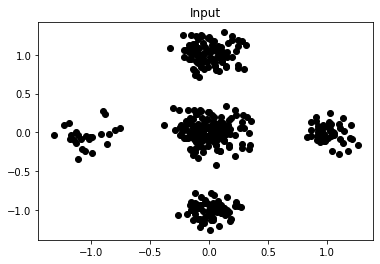

In [ ]:
odds = [a[n] for n in range(n*d) if n%2]
even = [a[n] for n in range(n*d) if n%2==0]
x1 = even
y1 = np.array(odds)
plt.plot(x1, y1, 'o', color='black');
plt.title("Input");

[0.02014316534059912, 1.0491611275482826, -0.08367039236827577, 0.7109575902108245, 0.008647238909811826, 1.0393213467061715, -0.14356983412569857, 1.0067814603039267, -0.05921922545725461, 1.0022722906732573, 0.1992612978665995, 1.191016640087037, 0.02306539849298787, 0.947768478292926, -0.08265999018925453, 1.087936328343045, 0.15324134425075459, 0.9766097713443944, -0.22181512478125165, 1.2536008013801327, 0.15444387300579923, 1.0412025395502305, -0.11794878736982149, 1.0067529014534982, 0.08739831841161662, 1.0529700387113443, -0.0127988281753062, 0.9137478227729261, 0.2812206734064897, 1.1737486334267309, 0.01872566425091414, 1.1890555559051867, -0.00887140869220206, 1.2227345538144176, 0.07983031814499043, 1.1198868673036484, 0.07495680615994232, 0.9729211617748607, -0.09029382176507751, 0.9805475097574028, -0.10008908967789114, 1.0701023948679362, -0.0664046678839535, 0.8465178160640864, 0.02707574714999184, 1.1269630747428827, 0.05230441335308137, 0.9109746881777593, 0.04632763

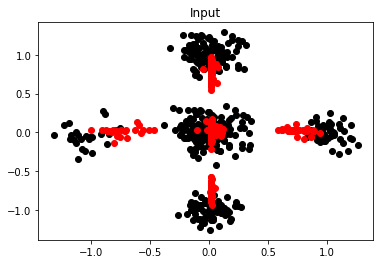

In [ ]:
x1=lst_x[lst_cost.index(min(lst_cost))]
odds = [a[n] for n in range(n*d) if n%2]
even = [a[n] for n in range(n*d) if n%2==0]
odds1 = [x1[n] for n in range(n*d) if n%2]
even1 = [x1[n] for n in range(n*d) if n%2==0]
print(a)
x1 = even
y1 = np.array(odds)
plt.plot(x1, y1, 'o', color='black');
plt.title("Input");
x2 = even1
y2 = np.array(odds1)
plt.plot(x2, y2, 'o', color='red');

# **Result**

949
400


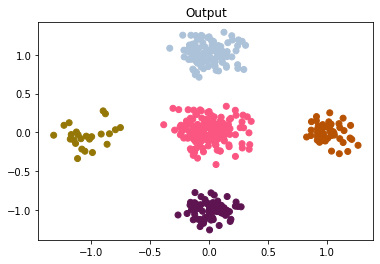

In [ ]:
colors=mcolors.XKCD_COLORS
colors= list(colors.keys())
print(len(colors))
y =[i for i in range(n)]
print(len(y))
color_map =  dict()
for i in range(len(y)):
    color_map[i]=colors[1*i]
#print(color_map)
y_color =[ color_map[i] for i in y]
# Adds a subplot at the 1st position
#fig.add_subplot(2, 1, 1)
#plt.scatter(x1, y1, c=y_color)
#plt.title("Input");
w=np.split(lst_x[lst_cost.index(min(lst_cost))],n)
for i in range(n):
    for j in range(n):
        dis = np.linalg.norm(w[i]-w[j])
        if dis<1.36e-1:
            y[j]=y[i]
y_color =[color_map[i] for i in y]
plt.scatter(x1, y1,c=y_color)
plt.title("Output");

<ipython-input-18-af2ce89e4717>:1: RuntimeWarning: invalid value encountered in log10
  plt.plot([i for i in range(iter)],[np.log10(i-lst_cost[-1]) for i in lst_cost[:-1]],'b',color='red')
<ipython-input-18-af2ce89e4717>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot([i for i in range(iter)],[np.log10(i-lst_cost[-1]) for i in lst_cost[:-1]],'b',color='red')


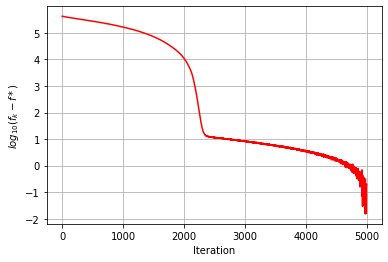

In [ ]:
plt.plot([i for i in range(iter)],[np.log10(i-lst_cost[-1]) for i in lst_cost[:-1]],'b',color='red')
plt.xlabel('Iteration')
plt.ylabel('$log_{10}(f_k-f*)$')
plt.grid(True)

<ipython-input-16-b3b1462df41d>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot([i for i in range(iter)],[(i-lst_cost[-1]) for i in lst_cost[:-1]],'b',color='yellow')


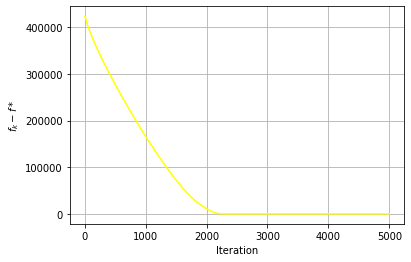

In [ ]:
plt.plot([i for i in range(iter)],[(i-lst_cost[-1]) for i in lst_cost[:-1]],'b',color='yellow')
plt.xlabel('Iteration')
plt.ylabel('$f_k-f*$')
plt.grid(True)

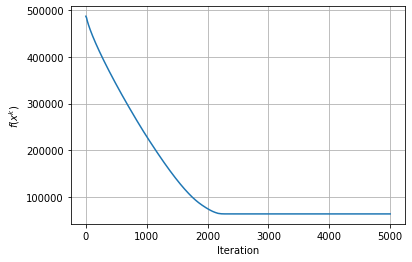

In [ ]:
plt.plot([i for i in range(iter+1)],np.array(lst_cost))
plt.xlabel('Iteration')
plt.ylabel('$f(x^k)$')
plt.grid(True)